In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from random import randint 
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
#Creating the dataset
train_labels=[]
train_samples=[]
for i in range(50):
  #5% of younger individual who has side effects
  r_young=randint(13,64)
  train_samples.append(r_young)
  train_labels.append(1)
  #5% of older people who does not have side effects
  r_old=randint(65,100)
  train_samples.append(r_old)
  train_labels.append(0)
for i in range(1000):
  #95% of younger individual who does not have side effects
  r_young=randint(13,64)
  train_samples.append(r_young)
  train_labels.append(0)
  #95% of older people who has side effects
  r_old=randint(65,100)
  train_samples.append(r_old)
  train_labels.append(1)
  #converting ndarray
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)
#Normalizing
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))

In [ ]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print("Number of GPU: ",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Number of GPU:  1


In [ ]:
model=Sequential([
                  Dense(units=16,input_shape=(1,),activation='relu'),
                  Dense(units=32,activation='relu'),
                  Dense(units=2,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_train_samples,y=train_labels,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.6783 - accuracy: 0.5968 - val_loss: 0.6641 - val_accuracy: 0.5429
Epoch 2/30
189/189 - 0s - loss: 0.6479 - accuracy: 0.6349 - val_loss: 0.6339 - val_accuracy: 0.6571
Epoch 3/30
189/189 - 0s - loss: 0.6156 - accuracy: 0.6942 - val_loss: 0.6049 - val_accuracy: 0.7238
Epoch 4/30
189/189 - 0s - loss: 0.5855 - accuracy: 0.7497 - val_loss: 0.5764 - val_accuracy: 0.7381
Epoch 5/30
189/189 - 0s - loss: 0.5557 - accuracy: 0.7677 - val_loss: 0.5476 - val_accuracy: 0.7571
Epoch 6/30
189/189 - 0s - loss: 0.5258 - accuracy: 0.8164 - val_loss: 0.5190 - val_accuracy: 0.7714
Epoch 7/30
189/189 - 0s - loss: 0.4964 - accuracy: 0.8302 - val_loss: 0.4908 - val_accuracy: 0.8048
Epoch 8/30
189/189 - 0s - loss: 0.4684 - accuracy: 0.8540 - val_loss: 0.4635 - val_accuracy: 0.8238
Epoch 9/30
189/189 - 0s - loss: 0.4412 - accuracy: 0.8651 - val_loss: 0.4376 - val_accuracy: 0.8571
Epoch 10/30
189/189 - 0s - loss: 0.4163 - accuracy: 0.8788 - val_loss: 0.4153 - val_accuracy: 0.8571

In [ ]:
#Test set
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)
scaler_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [ ]:
model.evaluate(scaler_test_samples,test_labels,verbose=1)

14/14 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.9381


[0.2677103281021118, 0.938095211982727]

In [ ]:
predictions=model.predict(x=scaler_test_samples,batch_size=10,verbose=0)

In [ ]:
for i in predictions:
  print(i)

[0.9529715 0.0470285]
[0.04820161 0.9517983 ]
[0.2970259 0.7029741]
[0.9558428  0.04415729]
[0.32738972 0.6726102 ]
[0.93469673 0.06530328]
[0.05938321 0.94061685]
[0.95081896 0.04918099]
[0.05938321 0.94061685]
[0.80254346 0.19745651]
[0.8918419  0.10815806]
[0.9152037  0.08479625]
[0.5671871 0.4328129]
[0.93469673 0.06530328]
[0.05168682 0.94831324]
[0.21653801 0.783462  ]
[0.9541888  0.04581121]
[0.0449403  0.95505965]
[0.02206984 0.9779302 ]
[0.03155888 0.9684411 ]
[0.04188989 0.95811003]
[0.9529715 0.0470285]
[0.02736377 0.9726362 ]
[0.82400966 0.17599037]
[0.8918419  0.10815806]
[0.9527244  0.04727563]
[0.9527244  0.04727563]
[0.11998187 0.8800181 ]
[0.95246845 0.04753149]
[0.95541495 0.04458506]
[0.03637307 0.963627  ]
[0.07648993 0.92351013]
[0.0390381 0.9609619]
[0.95466727 0.04533274]
[0.06938636 0.93061364]
[0.9529715 0.0470285]
[0.3924455 0.6075545]
[0.09444788 0.9055521 ]
[0.66704285 0.3329572 ]
[0.02053843 0.97946155]
[0.861371   0.13862903]
[0.07648993 0.92351013]
[0.955

In [ ]:
r_predictions=np.argmax(predictions,axis=1)

In [ ]:
for i in r_predictions:
  print(i)

0
1
1
0
1
0
1
0
1
0
0
0
0
0
1
1
0
1
1
1
1
0
1
0
0
0
0
1
0
0
1
1
1
0
1
0
1
1
0
1
0
1
0
1
1
0
0
1
1
1
1
0
1
0
0
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
0
1
0
1
0
0
0
0
1
0
1
0
1
0
1
0
1
0
0
0
1
0
0
0
0
1
1
0
1
1
1
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
1
0
0
1
1
1
1
1
0
1
0
0
1
1
1
1
1
1
1
1
0
0
0
1
1
0
1
1
0
0
0
1
1
1
1
0
1
0
1
0
1
1
0
1
0
0
0
0
1
1
0
1
0
1
0
0
1
1
0
1
0
1
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
1
1
1
1
1
0
0
0
0
1
1
0
1
0
1
0
0
0
0
1
0
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
0
0
0
0
1
0
1
0
0
0
1
0
0
1
1
0
1
0
0
1
1
1
1
0
0
0
1
1
1
0
0
1
1
1
0
1
1
1
1
1
1
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
1
0
0
0
1
0
1
1
0
1
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
1
1
1
1
1
0
0
1
0
1
1
0
1
0
1
0
0
1
1
1
1
1
0
1
0
1
1
0
1
0
1
0
0
1
0
0
1
0
0
1
0
1
1
0
0
0
0
1
1
1
1
1
0
1
0
0
0
1
1
0
0
1
0
0
0
0
1
1
0
1
1
1


In [ ]:
#confusion matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [ ]:
cm=confusion_matrix(y_true=test_labels,y_pred=r_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[194  16]
 [ 10 200]]


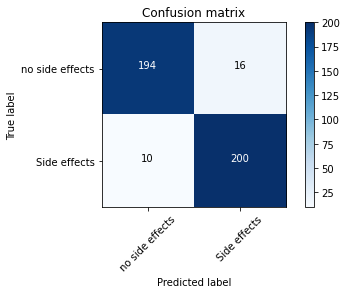

In [ ]:
cm_plot_labels=['no side effects','Side effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion matrix')

In [ ]:
#Saving the model
import os.path
if os.path.isfile('medical_trial_model.h5') is False: #checks whether already saved or not
  model.save('medical_trial_model.h5')


In [ ]:
from tensorflow.keras.models import load_model
new_model=load_model('medical_trial_model.h5')

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.get_weights()

[array([[-0.18033487,  0.28122348, -0.00663561,  0.43089515,  0.22017139,
         -0.18456656, -0.0055545 , -0.41620368,  0.36731657, -0.3165468 ,
         -0.3524357 ,  0.60670376,  0.36562514,  0.2843857 ,  0.5884157 ,
          0.19668603]], dtype=float32),
 array([ 0.        , -0.10731091,  0.        ,  0.1035534 ,  0.01760704,
         0.        ,  0.        ,  0.        , -0.09025925,  0.        ,
         0.        , -0.13956192, -0.1216874 , -0.07756998, -0.1316003 ,
        -0.07605244], dtype=float32),
 array([[-2.05859035e-01, -1.94397956e-01,  3.10700327e-01,
         -2.73076087e-01, -2.76917189e-01,  1.55483514e-01,
         -2.32176691e-01, -1.62437990e-01, -3.33381981e-01,
         -3.23832631e-02,  2.36028641e-01, -2.71761119e-02,
          1.93535894e-01, -1.59583732e-01, -1.06628910e-01,
          2.94708699e-01, -3.07246149e-01,  1.53674155e-01,
         -2.24070594e-01,  4.01698947e-02,  7.26998448e-02,
          7.87881315e-02,  1.33346885e-01,  1.39492482e-01,
 

In [ ]:
new_model.optimizer

In [ ]:
#Using model.to_ison(saves only the architecture)
json_string=model.to_json()

In [ ]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_3_input"}}, {"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

In [ ]:
#model recontruction from JSON
from tensorflow.keras.models import model_from_json
model_arch=model_from_json(json_string)

In [ ]:
model_arch.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save_weights('my_model_weights.h5')